## 栈和队列总结
#### 栈和队列的实现
#### 栈和队列的实际应用
#### 辅助栈
#### 单调栈，单调队列 -单独整理
#### 参考[代码随想录-栈和队列](https://programmercarl.com/%E6%A0%88%E4%B8%8E%E9%98%9F%E5%88%97%E7%90%86%E8%AE%BA%E5%9F%BA%E7%A1%80.html),[cs-note](http://www.cyc2018.xyz/%E7%AE%97%E6%B3%95/Leetcode%20%E9%A2%98%E8%A7%A3/Leetcode%20%E9%A2%98%E8%A7%A3%20-%20%E6%A0%88%E5%92%8C%E9%98%9F%E5%88%97.html#_1-%E7%94%A8%E6%A0%88%E5%AE%9E%E7%8E%B0%E9%98%9F%E5%88%97)

### 栈和队列的实现

### LC. 232 [用栈实现队列](https://leetcode.cn/problems/implement-queue-using-stacks/)
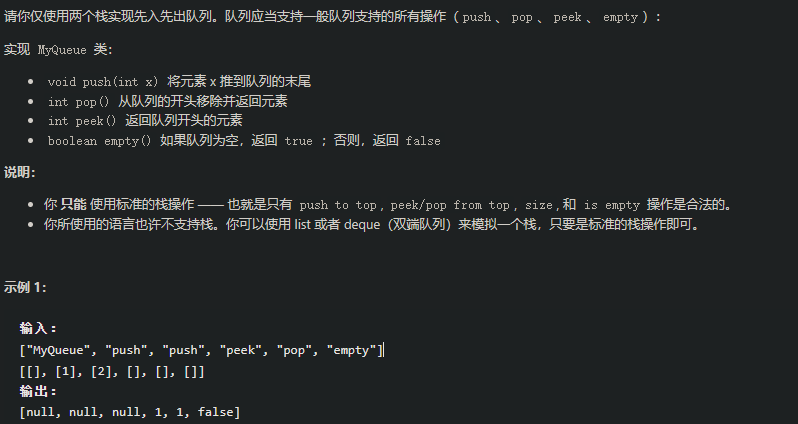

In [1]:
class MyQueue:

    def __init__(self):
        self.stack_in = []
        self.stack_out = []

    def push(self, x: int) -> None:
        self.stack_in.append(x)

    def pop(self) -> int:
        for i in range(len(self.stack_in)-1):
            self.stack_out.append(self.stack_in.pop())
        num = self.stack_in.pop()
        for i in range(len(self.stack_out)):
            self.stack_in.append(self.stack_out.pop())
        return num

    def peek(self) -> int:
        for i in range(len(self.stack_in)-1):
            self.stack_out.append(self.stack_in.pop())
        num = self.stack_in[0]
        for i in range(len(self.stack_out)):
            self.stack_in.append(self.stack_out.pop())
        return num

    def empty(self) -> bool:
        if len(self.stack_in)==0:
            return True
        else:return False

### LC. 225[用队列实现栈](https://leetcode.cn/problems/implement-stack-using-queues/)
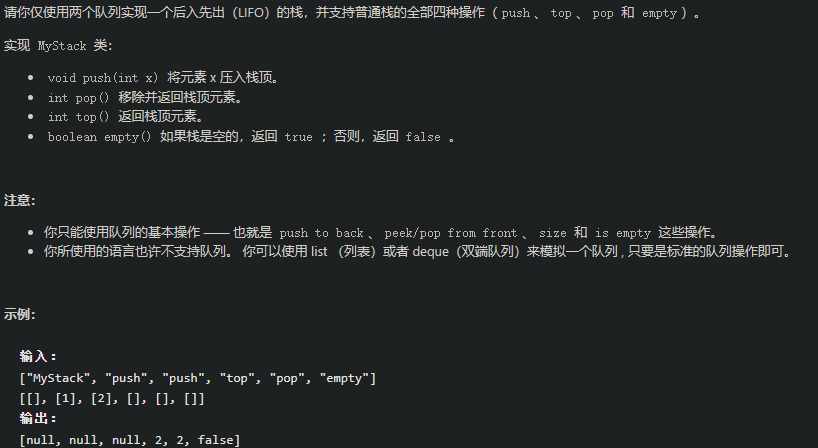

In [2]:
class MyStack:

    def __init__(self):
        self.que1 = []
        self.que2 = []

    def push(self, x: int) -> None:
        self.que1.append(x)

    def pop(self) -> int:
        for i in range(len(self.que1)-1):
            self.que2.append(self.que1.pop(0))
        num = self.que1.pop(0)
        for i in range(len(self.que2)):
            self.que1.append(self.que2.pop(0))
        return num

    def top(self) -> int:
        lenq1 = len(self.que1)
        for i in range(lenq1):                 
            if i == (lenq1-1):
                num = self.que1[0]
            self.que2.append(self.que1.pop(0))

        for i in range(len(self.que2)):
            self.que1.append(self.que2.pop(0))
        return num

    def empty(self) -> bool:
        return True if len(self.que1)==0 else False

### 栈和队列的实际应用

### LC. 20 [有效的括号](https://leetcode.cn/problems/valid-parentheses/)
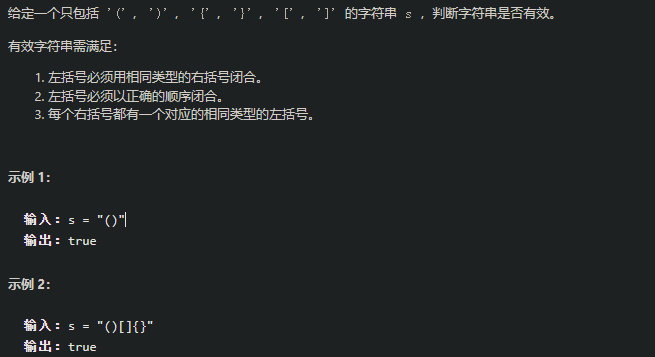

In [3]:
# 无注释
def lc20(s):
    dic = {
            ')':'(',
            ']':'[',
            '}':'{'
        }
    stack = []
    for s_ in s:
        if s_ not in dic:     # 只有这三个括号，没有闲杂字符等
            stack.append(s_)
        else:
            if not stack or stack[-1] != dic[s_]:return False
            else: stack.pop()
    return not stack
lc20('[]{()}')

True

### LC. 1047 [删除字符串中的所有相邻重复项](https://leetcode.cn/problems/remove-all-adjacent-duplicates-in-string/)
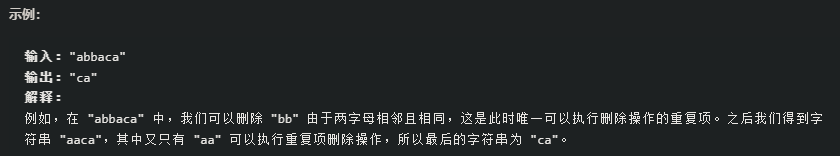

In [4]:
def lc1047(s):
    stack = []
    for i in s:
        if len(stack)>0 and i == stack[-1]:
            stack.pop()
            continue
        stack.append(i)
    return ''.join(stack)
lc1047("abbaca")

'ca'

### LC. 150 [逆波兰表达式求值](https://leetcode.cn/problems/evaluate-reverse-polish-notation/)
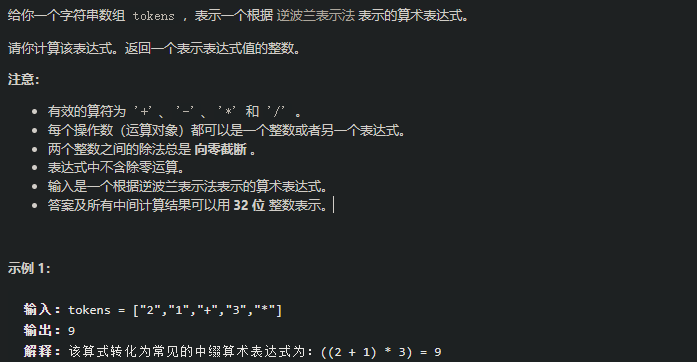

In [5]:
# 用栈模拟，遇到符号的时候就弹出两个计算，并添加回去
def lc150(tokens):
    sym = ['+','-','*','/']
    stack = []
    for t in tokens:
        if t not in sym:
            stack.append(t)
        else:
            a,b = stack.pop(),stack.pop()
            stack.append(str(int(eval(b+t+a))))
    return int(stack.pop())
tokens = ["10","6","9","3","+","-11","*","/","*","17","+","5","+"]
lc150(tokens)

22

### 辅助栈

### LC. 155 [最小栈](https://leetcode.cn/problems/min-stack/description)
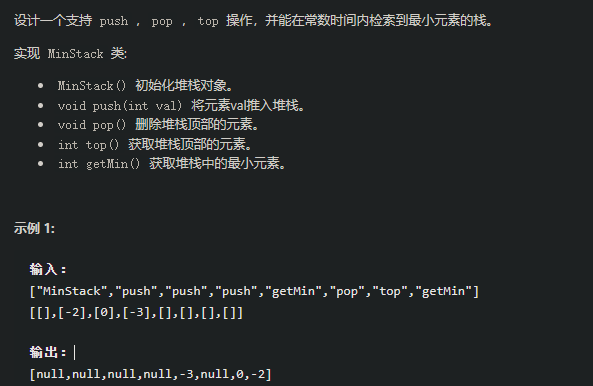

In [6]:
# 使用辅助栈实现最小栈
class MinStack:
    # 辅助栈：只要在压栈的时候将压栈当时的最小值一块记录到压栈的数组
    def __init__(self):
        self.deq = []

    def push(self, val: int) -> None:
        if not self.deq:
            self.deq.append([val,val])
        else:
            self.deq.append([val,min(val,self.deq[-1][1])]) # 压栈的时候记录当前要压栈的值和当前最小的值

    def pop(self) -> None:
        self.deq.pop()

    def top(self) -> int:
        return self.deq[-1][0]

    def getMin(self) -> int:
        return self.deq[-1][1]

### LC.739 [每日温度](https://leetcode.cn/problems/daily-temperatures/description/)
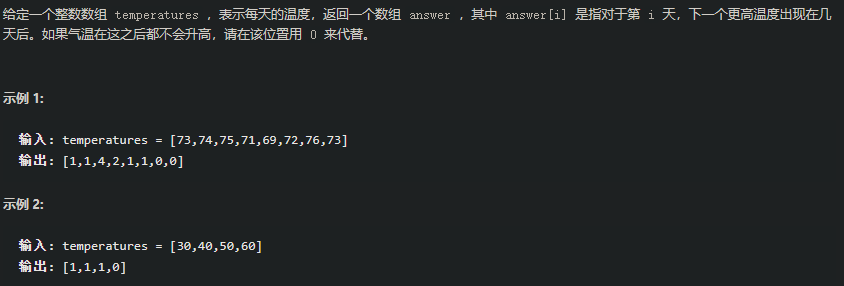

In [7]:
# 都用辅助栈实现
def lc739(temperatures):
    # 一种新鲜的解法：辅助栈，每次压入[temp,index]
    stack = []
    dic = {} # 收集答案,因为弹栈的时候是乱序的，所以用一个字典记录结果
    res = []
    for i in range(len(temperatures)):
        # 如果不是上一个最大，就压栈[tmp[i],i]  用i辅助
        if not stack or temperatures[i] <= stack[-1][0]:
            stack.append([temperatures[i],i])
        else:
            # 小于他的都弹出
            while stack and temperatures[i] > stack[-1][0]:
                tmp = stack.pop()
                dic[tmp[1]] = i - tmp[1]  
            stack.append([temperatures[i],i])
    # 将最后stack中剩下的值弹出来
    while stack:
        tmp = stack.pop()
        dic[tmp[1]] = 0

    for i in range(len(temperatures)):
        res.append(dic[i])
    return res

lc739([73,74,75,71,69,72,76,73])

[1, 1, 4, 2, 1, 1, 0, 0]

### LC. 503 [下一个更大元素 II](https://leetcode.cn/problems/next-greater-element-ii/description/)
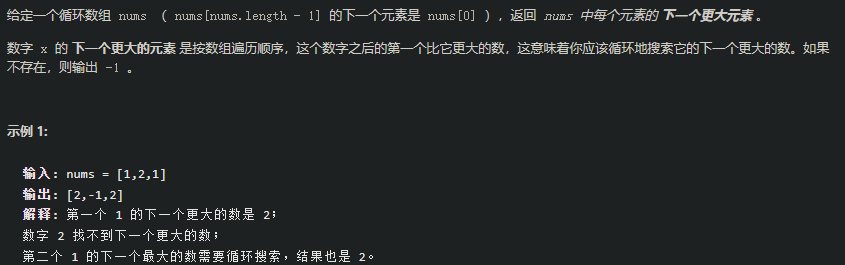

In [8]:
def lc503(nums):
    len_n = len(nums)
    nums = nums + nums[:-1] # 模拟循环数组
    stack = []
    dic = {}
    for i in range(2*len_n-1):
        if not stack or nums[i] <= stack[-1][0]:
            stack.append([nums[i],i])
        else:
            while stack and nums[i] > stack[-1][0]:
                tmp = stack.pop()
                dic[tmp[1]] = nums[i]
            stack.append([nums[i],i])
    res = []
    for i in range(len_n):
        if i not in dic:
            res.append(-1)
        else:
            res.append(dic[i])
    return res

lc503([1,2,3,4,3])

[2, 3, 4, -1, 4]